<a href="https://colab.research.google.com/github/RichardLowther/MAT-421/blob/main/Module_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Richard Lowther

MAT 421 HW 5

Chapter 1

Linear Spaces and Combinations

In [14]:
# Can only add and subtract matrices with the same dimension

import numpy as np

a = [1, 2, 3]
b = [4, 5, 6]
print ('a + b =', np.add(a,b))
print ('a - b =', np.subtract(a,b))

# You can also multiply matrices only if the number of columns in the first matrix is equal to the number of rows in the second matrix
# The result is a matrix with the number of rows in the first matrix and the number of columns in the second
print ('a * b =', np.multiply(a,b))

a + b = [5 7 9]
a - b = [-3 -3 -3]
a * b = [ 4 10 18]


In [17]:
# Linear independence can be determined by taking the determinant of the matrix and seeing if it is a nonzero value
# Det = 0, not linearly independent

a = np.array([[8, -9, 0], [4, 1, 21], [17, -1, 12]])
print(np.linalg.det(a))

b = np.array([[0, 0, 1], [4, 1, 1], [0, 0, 0]])
print(np.linalg.det(b))


-2517.0
0.0


In [3]:
# Matrices and linear equations can be solved using python
# 50x + 20y + 17z = 23
# 00x + 13y + 80z = 10
# 08x + 08y + 10z = 00

# Note the equation A*x = y, where x will signify the values of x, y, and z

import numpy as np

A = np.array([[50, 20, 17],
              [0, 13, 80],
              [8, 8, 10]])
y = np.array([23, 10, 0])

x = np.linalg.solve(A, y)

print(x)

# Matrix inversion approach (x = (A^-1)*y) should provide the same value

A_inv = np.linalg.inv(A)

x = np.dot(A_inv, y)
print(x)

# Can decompose matrix A into L and U

from scipy.linalg import lu

P, L, U = lu(A)
print('P:\n', P)
print('L:\n', L)
print('U:\n', U)
print('LU:\n',np.dot(L, U))


[ 0.85499032 -1.26900746  0.33121371]
[ 0.85499032 -1.26900746  0.33121371]
P:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
L:
 [[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.16       0.36923077 1.        ]]
U:
 [[ 50.          20.          17.        ]
 [  0.          13.          80.        ]
 [  0.           0.         -22.25846154]]
LU:
 [[50. 20. 17.]
 [ 0. 13. 80.]
 [ 8.  8. 10.]]


Eigenvalues and Eigenvectors

In [7]:
# A*x = λ*x, Where A is n × n matrix, x is an n × 1 column vector (X≠0), and λ (eigenvalue) is some scalar.
# The associated vector x is called an eigenvector corresponding to λ
# We can use python to produce the eigenvalue/vector

import numpy as np
from numpy.linalg import eig
a = np.array([[11, 32],
              [17, 9]])
lmda,x = eig(a)
print('E-value:', lmda)
print('E-vector', x)

E-value: [ 33.34523506 -13.34523506]
E-vector [[ 0.81989058 -0.79585975]
 [ 0.57252024  0.60548102]]


Orthogonality

In [21]:
# If the angle between the two vectors is pi/2, the vectors are orthogonal

from numpy import arccos, dot
from numpy.linalg import norm

a = np.array([[117, 21, 6]])
b = np.array([[22, 11, 42]])
theta = arccos(dot(v, w.T)/(norm(v)*norm(w)))
print(theta)

[[1.0149026]]


Linear Regression

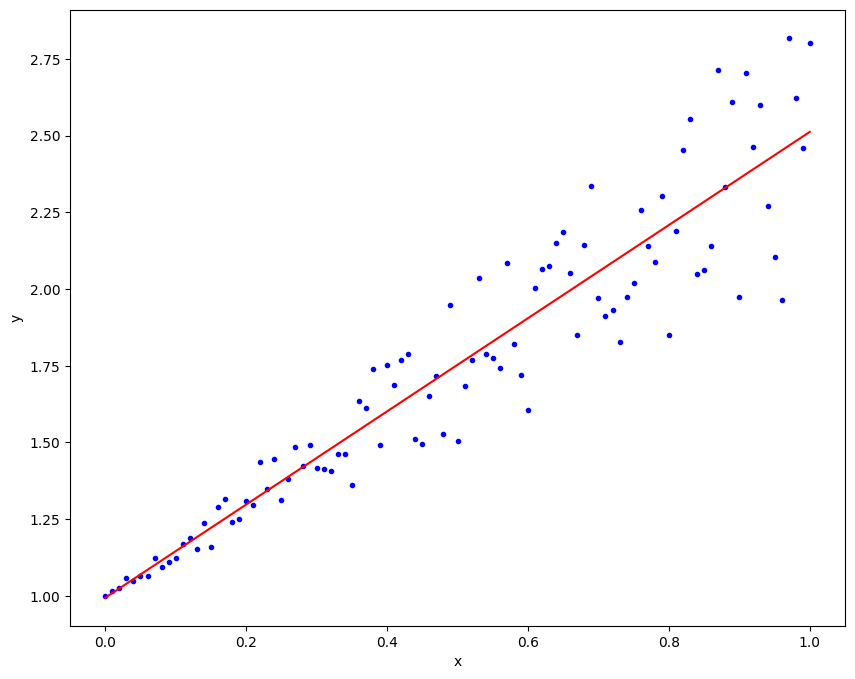

In [27]:
# Least Squares Regression, find the parameters of the estimation function that minimizes the total squared error

from scipy import optimize
import matplotlib.pyplot as plt

# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()